In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
from itertools import islice
from graphillion import GraphSet

## 第k最短路

- KSP(K-shortest path problem) と呼ばれる
- networkX の`shortest_simple_paths` 関数は経路の短い順のgenerator を返すので、k番目を取るだけでよい
    - [ドキュメント](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.simple_paths.shortest_simple_paths.html)
- Yenのアルゴリズムをベースにしており、$O(KN^3)$
    - [FINDING THE K SHORTEST LOOPLESS PATHS IN A NETWORK](https://people.csail.mit.edu/minilek/yen_kth_shortest.pdf)
- 超雑な概要
    - 直前に見つけた最短路から、途中までは同じになるような路を列挙
    - 列挙した路はヒープで管理し、キー(長さ)が最小のものを次の最短路とする
    - for $i=1,2,...$
        - 直前の最短路を $s \leadsto v_{i-1} \to v_i \leadsto t$ に分解する
        - $v_{i-1} \to v_i$ の辺を使わず$v_{i-1}$ から$t$ への最短路pを計算
        - $s \leadsto v_{i-1} \leadsto^{p} t$ が今まで列挙していなければヒープに追加

In [2]:
# グリッドグラフの作成
random.seed(1)

n = 5
k = 10
G = nx.grid_2d_graph(n, n)
pos = {(i, j): (i, j) for (i, j) in G.nodes()}
for (i, j) in G.edges():
    G[i][j]["weight"] = random.randint(1, 10)

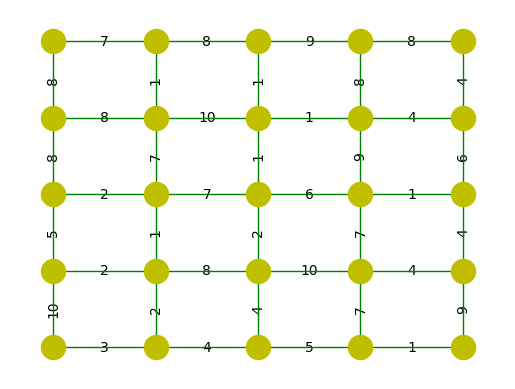

In [3]:
# 対象とするグラフの描画
nx.draw_networkx_edge_labels(
    G, pos=pos, edge_labels=nx.get_edge_attributes(G, "weight")
)
nx.draw(
    G, with_labels=False, node_size=300, pos=pos, node_color="y", edge_color="g", width=1
)
plt.show()

In [4]:
# k番目までの最短路と長さを出力
for i, path in enumerate(islice(
    nx.shortest_simple_paths(G, source=(0, 0), target=(n - 1, n - 1), weight="weight"),
    k,
), 1):
    length = sum([G[u][v]['weight'] for (u,v) in zip(path,path[1:])])
    print(f'{i}-th path: {length=}, {path=}, ')

1-th path: length=23, path=[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4)], 
2-th path: length=23, path=[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4)], 
3-th path: length=25, path=[(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4)], 
4-th path: length=30, path=[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4)], 
5-th path: length=30, path=[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)], 
6-th path: length=30, path=[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)], 
7-th path: length=31, path=[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)], 
8-th path: length=31, path=[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)], 
9-th path: length=31, path=[(0, 0), (1, 0), (1, 1), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4)], 
10-th path: length=32, path=[(0, 0), (1, 0), (1, 1), (1, 2), (1, 3

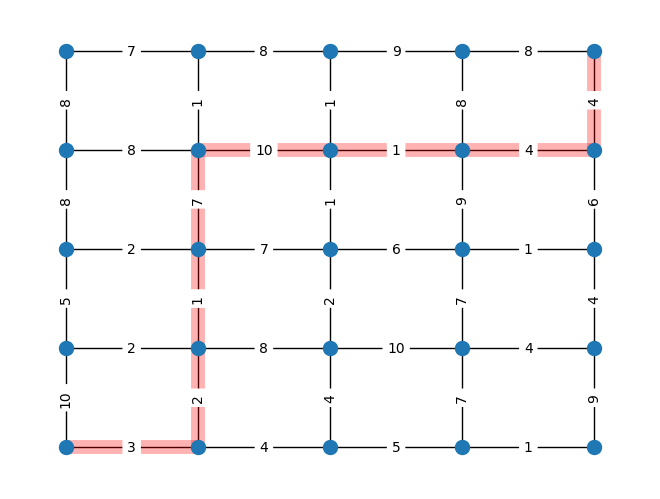

In [5]:
# k番目の最短路を描画
def print_path_on_graph(G, path, pos):
    edge_list = []
    i = path[0]
    for count in range(1, len(path)):
        j = path[count]
        edge_list.append((i, j))
        i = j
    plt.figure()
    nx.draw(G, pos=pos, with_labels=False, node_size=100)
    nx.draw(
        G,
        pos=pos,
        with_labels=False,
        node_size=100,
        edgelist=edge_list,
        edge_color="red",
        width=10,
        alpha=0.3,
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, "weight"))
    plt.show()

print_path_on_graph(G, path, pos)

## 無向パス（閉路，森など）の列挙

- [Graphillion](https://github.com/takemaru/graphillion)
    - グラフセットもしくはグラフ集合に対する検索、最適化および列挙のための Python パッケージ

In [6]:
# グリッドグラフの構築とパスの総数の計算
random.seed(1)

n = 5
G = nx.grid_2d_graph(n, n)
pos = {(i, j): (i, j) for (i, j) in G.nodes()}
weight = {}
for (i, j) in G.edges():
    weight[i, j] = random.randint(1, 10)
    G[i][j]['weight'] = weight[i,j]

# 総数の計算    
GraphSet.set_universe(G.edges())
paths = GraphSet.paths(terminal1=(0, 0), terminal2=(n - 1, n - 1))
len(paths)  # パスの総数

8512

In [7]:
# k番目までの最短路と長さを出力
for i, path in enumerate(islice(paths.min_iter(weight), 10), 1):
    length = sum([G[u][v]['weight'] for (u,v) in path])
    path = [u for (u,_) in path]
    print(f'{i}-th path: {length=}, {path=}, ')

1-th path: length=23, path=[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3)], 
2-th path: length=23, path=[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3)], 
3-th path: length=25, path=[(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3)], 
4-th path: length=30, path=[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3)], 
5-th path: length=30, path=[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3)], 
6-th path: length=30, path=[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3)], 
7-th path: length=31, path=[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4)], 
8-th path: length=31, path=[(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4)], 
9-th path: length=31, path=[(0, 0), (0, 1), (0, 1), (0, 2), (1, 0), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3)], 
10-th path: length=32, path=[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4)], 


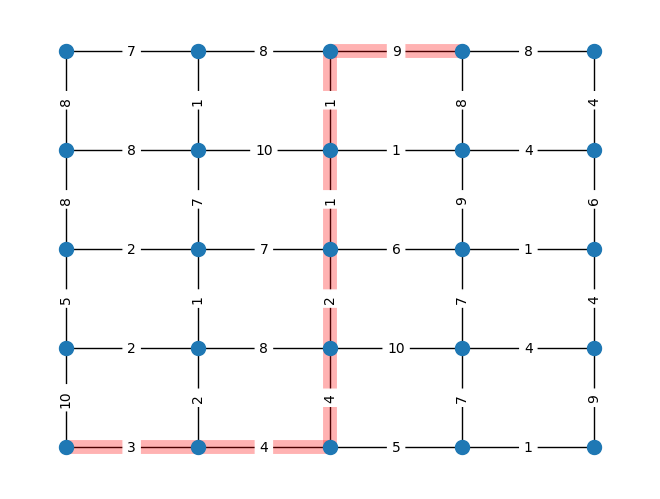

In [8]:
# k番目の最短路を描画
print_path_on_graph(G, path, pos)

### 最長パスの列挙（最長路問題）

- iterable で返ってくるので後ろから取れば最長路が解ける
- 一般にはNP-hard だが、疎なグラフ(路の総数が少ない)場合はこれでもいける

In [9]:
# 最長路と長さを出力
path = list(islice(paths.max_iter(weight), 1))[0]
length = sum([G[u][v]['weight'] for (u,v) in path])
print(f'longest path: {length=}')

longest path: length=154


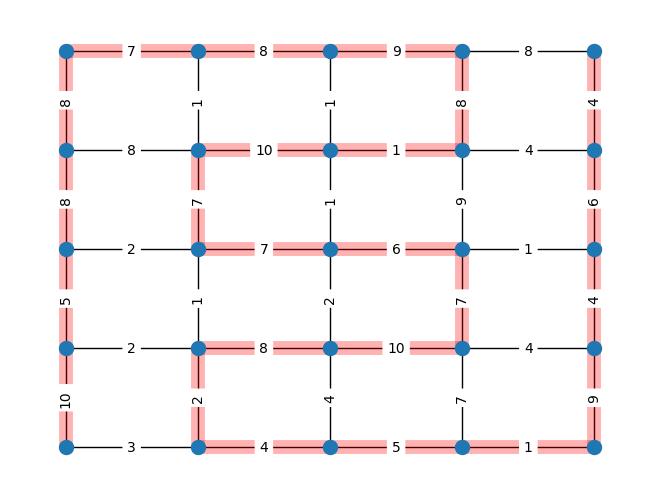

In [10]:
# 最長路を描画
plt.figure()
nx.draw(G, pos=pos, with_labels=False, node_size=100)
nx.draw(
    G,
    pos=pos,
    with_labels=False,
    node_size=100,
    edgelist=path,
    edge_color="red",
    width=10,
    alpha=0.3,
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)
plt.show()

In [11]:
# パスの総数が 2 ** (n/2) になるようなグラフ
n = 100 * 2 + 1
G = nx.DiGraph()
# G = nx.MultiDiGraph()

G.add_nodes_from(range(n))
pos = {}
pos = {i: ((i + 1) // 2, i // 2) for i in G.nodes()}
# pos = nx.kamada_kawai_layout(G)
for i in range(0, n - 2, 2):
    w = 1 << (i // 2)
    G.add_edge(i, i+1, weight=w-1)
    G.add_edge(i+1, i+2, weight=1)
    G.add_edge(i, i+2, weight=0)

# 対象とするグラフの描画
if n < 10:
    nx.draw_networkx_edge_labels(
        G, pos=pos, edge_labels=nx.get_edge_attributes(G, "weight")
    )
    nx.draw(
        G, with_labels=False,
        node_size=10,
        pos=pos, node_color="y",
        edge_color="g",
        width=1
    )
    plt.show()

In [12]:

# 総数の計算    
GraphSet.set_universe(G.edges())
paths = GraphSet.paths(terminal1=0, terminal2=n-1)
paths.len()  # パスの総数

1267650600228229401496703205376

In [13]:
# 最長路の計算
path = list(islice(paths.max_iter(), 1))[0]
length = sum([G[u][v]['weight'] for (u,v) in path])
print(f'longest path: {length=}')

longest path: length=1267650600228229401496703205375


### 閉路の列挙


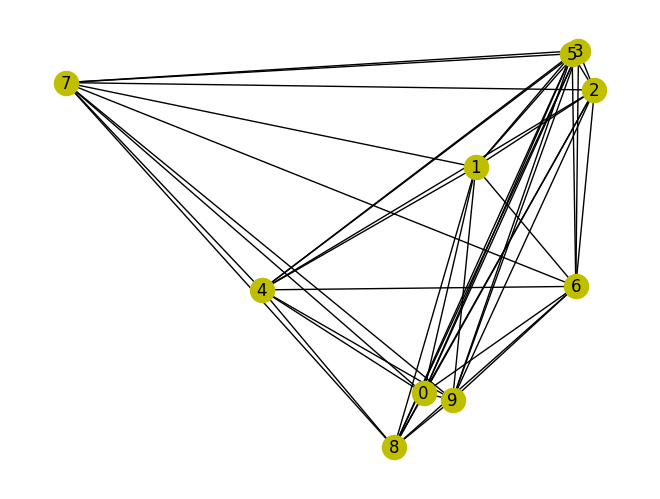

In [14]:
# ランダムなグラフの生成
def distance(x1, y1, x2, y2):
    """distance: euclidean distance between (x1,y1) and (x2,y2)"""
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

n = 10
x = dict([(i, 100 * random.random()) for i in range(n)])
y = dict([(i, 100 * random.random()) for i in range(n)])
G = nx.Graph()
c = {}
pos = {}
for i in range(n):
    pos[i] = x[i], y[i]
    for j in range(n):
        if j > i:
            c[i, j] = distance(x[i], y[i], x[j], y[j])
            G.add_edge(i, j, weight=c[i, j])

nx.draw(G, pos=pos, with_labels=True, node_color="y")

[(0, 1), (0, 2), (1, 3), (2, 3)]


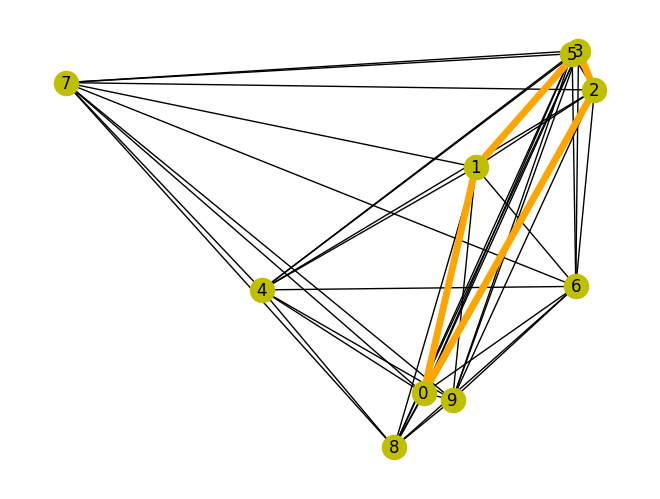

In [15]:
# 頂点0を含む長さ4の閉路をランダムに選ぶ
edges = [(u,v,data['weight']) for u,v,data in G.edges(data=True)]
# edges = list(G.edges())
GraphSet.set_universe(edges)

cycles = GraphSet.cycles()
gs = cycles.graph_size(4)
gs2 = gs.including(0)  # include depot
cycle = gs2.choice()
print(cycle)
nx.draw(G, pos=pos, with_labels=True, node_color="y")
nx.draw_networkx_edges(G, pos=pos, edgelist=cycle, edge_color="orange", width=5)

[(0, 3), (0, 7), (3, 8), (7, 8)]


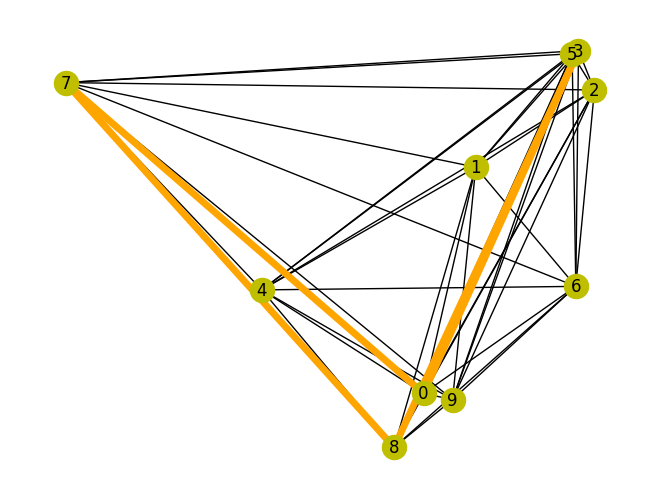

In [16]:
# 頂点0を含む長さ4の閉路で最小のものを選ぶ
# Graphillion は(u,v,weight) のリストを重み付きグラフとして扱う
# edges = list(G.edges())
edges = [(u,v,data['weight']) for u,v,data in G.edges(data=True)]
GraphSet.set_universe(edges)

cycles = GraphSet.cycles()
gs = cycles.graph_size(4)
gs2 = gs.including(0)  # include depot
cycle = gs2.choice()
cycle = list(gs2.max_iter())[0]
print(cycle)
nx.draw(G, pos=pos, with_labels=True, node_color="y")
nx.draw_networkx_edges(G, pos=pos, edgelist=cycle, edge_color="orange", width=5)

### Hamilton閉路の列挙

181440


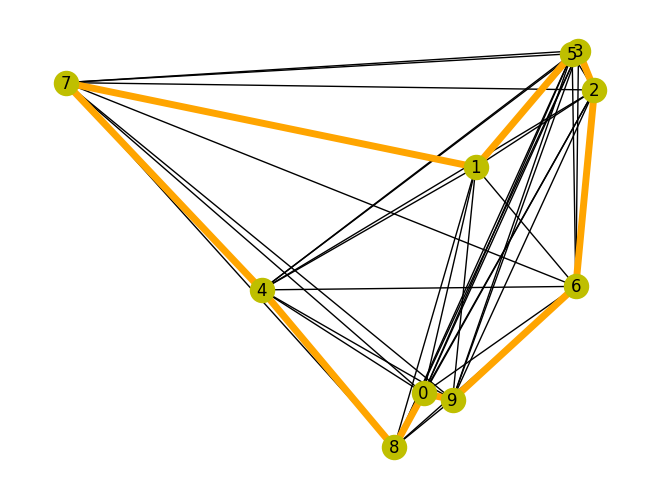

In [17]:
# ハミルトン閉路で距離が最小のものを計算(= TSP)
cycles = GraphSet.cycles(is_hamilton=True)
print(len(cycles))
for p in cycles.min_iter(c):
    hamilton_cycle = p
    break
nx.draw(G, pos=pos, with_labels=True, node_color="y")
nx.draw_networkx_edges(
    G, pos=pos, edgelist=hamilton_cycle, edge_color="orange", width=5
);

## 多目的最短路問題

- 辺に複数のコストがある場合、多目的最適化問題になる
    - e.g. 費用・時間のグラフ
- ある解$x, y$ に対するコストm次元実ベクトル$f(x), f(y)$ を何らかの意味で最小化したい
    - 標準的順序を入れて$f(x) \prec f(y)$ のとき$x$ は$y$ に優越するという
        - $f(x) \prec f(y) \iff f(x) \not= f(y) かつ f(x)_i \prec f(y)_i \text{ for every }i$
    - $x$ に優越する解がないとき、非劣解、パレート最適解 という
- すべてのパレート最適解の集合を求めたいが、難しい場合もある
    - 金融工学におけるポートフォリオ理論では有効フロンティアと呼ばれる
    - 目的関数が凸なら有効フロンティアも凸
- 難しい場合、適当な重み$\alpha \in \mathbb{R}^m$ を決めて$(\alpha,x)$ のスカラを最小化する問題に帰着

In [21]:
# 費用、時間を持つグリッドグラフを作成
m, n = 10, 10
lb, ub = 1, 100
G = nx.grid_2d_graph(m, n)
for (i, j) in G.edges():
    G[i][j]["cost"] = random.randint(lb, ub)
    G[i][j]["time"] = 100 / G[i][j]["cost"]

In [22]:
# 重みalpha の下でスカラ化して最短経路を計算
# alpha は複数パターン用意する(alpha=[0, 0.01, ..., 1])
x, y = [], []
for k in range(100):
    alpha = 0.01 * k
    for (i, j) in G.edges():
        G[i][j]["weight"] = alpha * G[i][j]["cost"] + (1 - alpha) * G[i][j]["time"]

    pred, distance = nx.dijkstra_predecessor_and_distance(G, source=(0, 0))
    # print("minimum cost=", distance[m-1,n-1])
    j = (m - 1, n - 1)
    cost = time = 0
    while i != (0, 0):
        i = pred[j][0]
        cost += G[i][j]["cost"]
        time += G[i][j]["time"]
        j = i
    # print(cost,time)
    x.append(cost)
    y.append(time)

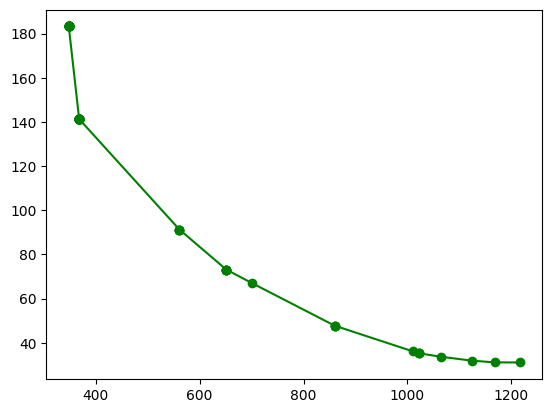

In [23]:
# それぞれのalpha での解を描画
plt.plot(x, y, color="green", marker="o")

## すべての単純パスを列挙するアルゴリズム

- 訪れた頂点を覚えておきながら深さ優先探索をする

In [24]:
import collections

def all_simple_paths_graph(G, source, targets, cutoff):
    visited = collections.OrderedDict.fromkeys([source])
    # visited に現在のパスの情報を追加保存する
    # 必要がある．辞書の値に，積んである荷物量や発時刻などを保管しておく．

    stack = [iter(G[source])]
    while stack:
        children = stack[-1]  # 後続点の集合をイテレータとして得る
        # print("children=", list(children) )

        child = next(children, None)  # 後続点から1つの点を選択する．なければNone
        if child is None:  # もう調べる後続点がなければ、スタックを減らす
            stack.pop()
            visited.popitem()
        elif len(visited) < cutoff:
            if child in visited:  # すでに訪問いている点ならコンティニュー
                continue

            #  ここでvisited[-1] からchildへ移動可能かどうかのcheckを入れる。
            print(" from", list(visited)[-1], " to", child)
            # 時間枠のcheckし、実行不可能や閾値を超えた待ち時間が生じるならなcontinueなど

            if child in targets:
                # visitedに現在の点を追加したものを出力
                yield list(visited) + [child]
            visited[child] = None
            if targets - set(visited.keys()):
                # expand stack until find all targets
                stack.append(iter(G[child]))
            # 次の後続点集合をスタックに追加（深さ優先探索）
            else:
                visited.popitem()  # maybe other ways to child
        else:  # len(visited) == cutoff:
            for target in (targets & (set(children) | {child})) - set(visited.keys()):
                yield list(visited) + [target]
            # visitedに現在の点を追加したものを出力
            stack.pop()  # カットオフ値に達したら、スタックを減らす
            visited.popitem()

 from 0  to 1
 from 1  to 2
[0, 1, 2, 3]
 from 1  to 3
[0, 1, 3]
 from 0  to 2
 from 2  to 1
[0, 2, 1, 3]
 from 2  to 3
[0, 2, 3]
 from 0  to 3
[0, 3]


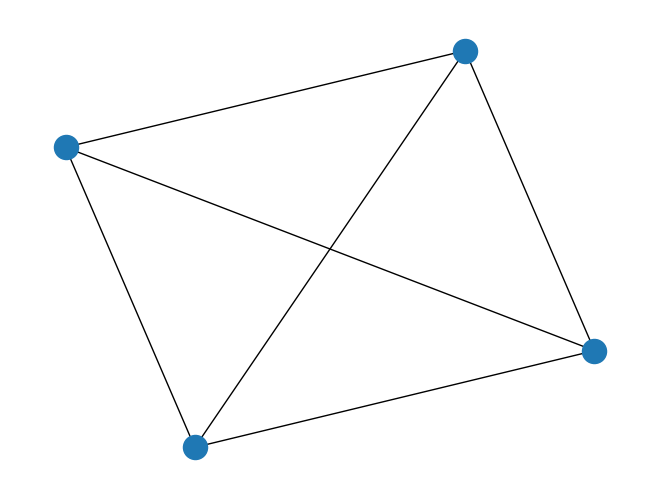

In [25]:
# 4頂点の完全グラフで列挙
G = nx.complete_graph(4)
nx.draw(G)

for path in all_simple_paths_graph(G, source=0, targets={3}, cutoff=len(G) - 1):
    print(path)

In [26]:
# Graphillion を使う場合
GraphSet.set_universe(G.edges())
paths = GraphSet.paths(terminal1=0, terminal2=3)
for path in paths.min_iter():
    print(path)

[(0, 3)]
[(0, 2), (2, 3)]
[(0, 1), (1, 3)]
[(0, 2), (1, 2), (1, 3)]
[(0, 1), (1, 2), (2, 3)]


### Graphset Example

GraphSet([[((0, 0), (0, 1))], [((0, 0), (1, 0)), ((0, 1), (1, 1)), ((1, 0),  ...


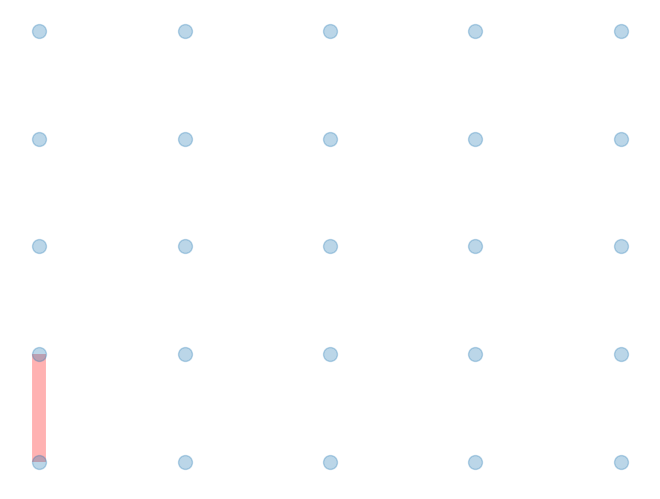

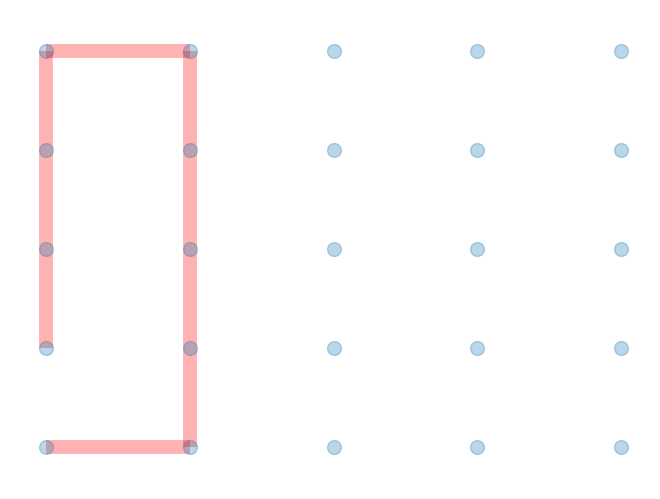

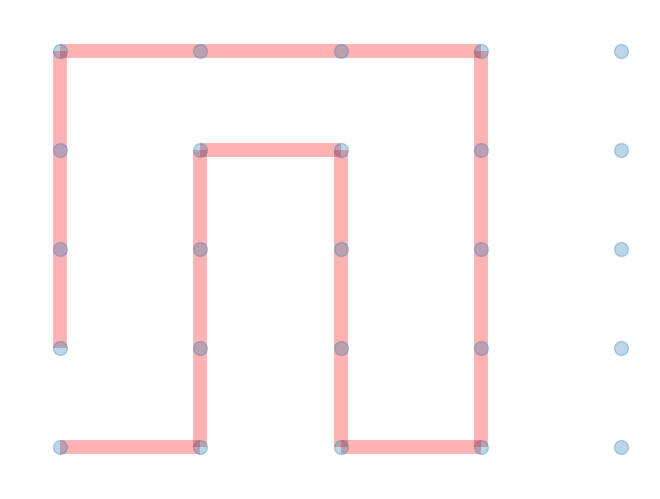

In [28]:
## GraphSet sample

G1 = nx.grid_2d_graph(5, 5)
G2 = nx.grid_2d_graph(3, 3)

GraphSet.set_universe(G1.edges())

gs = GraphSet([G2.edges()])

# graphset にgsを渡してもだめ?
paths = GraphSet.paths(terminal1=(0,0), terminal2=(0,1), graphset=None)
# paths = gs.paths(terminal1=(0,0), terminal2=(0,1))

print(paths)

for path in islice(paths, 3):
    pos = {(i, j): (i, j) for (i, j) in G1.nodes()}
    nx.draw(
        G1,
        pos=pos,
        with_labels=False,
        node_size=100,
        edgelist=path,
        nodelist=G1.nodes(),
        edge_color="red",
        width=10,
        alpha=0.3,
    )
    plt.show()


### ZDD tutorial

In [29]:
from graphillion import GraphSet, tutorial
from tutorial_util import draw_zdd, zdd_size, draw_subgraph, draw_universe

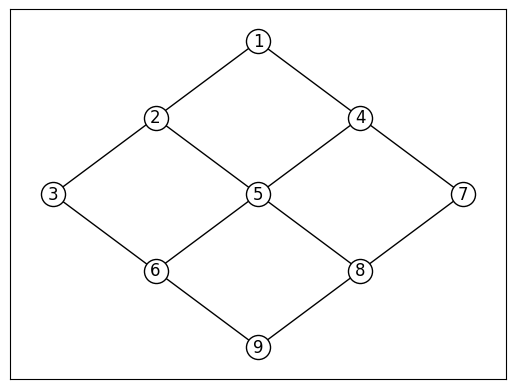

In [30]:
grid = tutorial.grid(2, 2)
GraphSet.set_universe(grid)
draw_universe()

In [31]:
paths =  GraphSet.paths(1, 9)
len(paths)

12

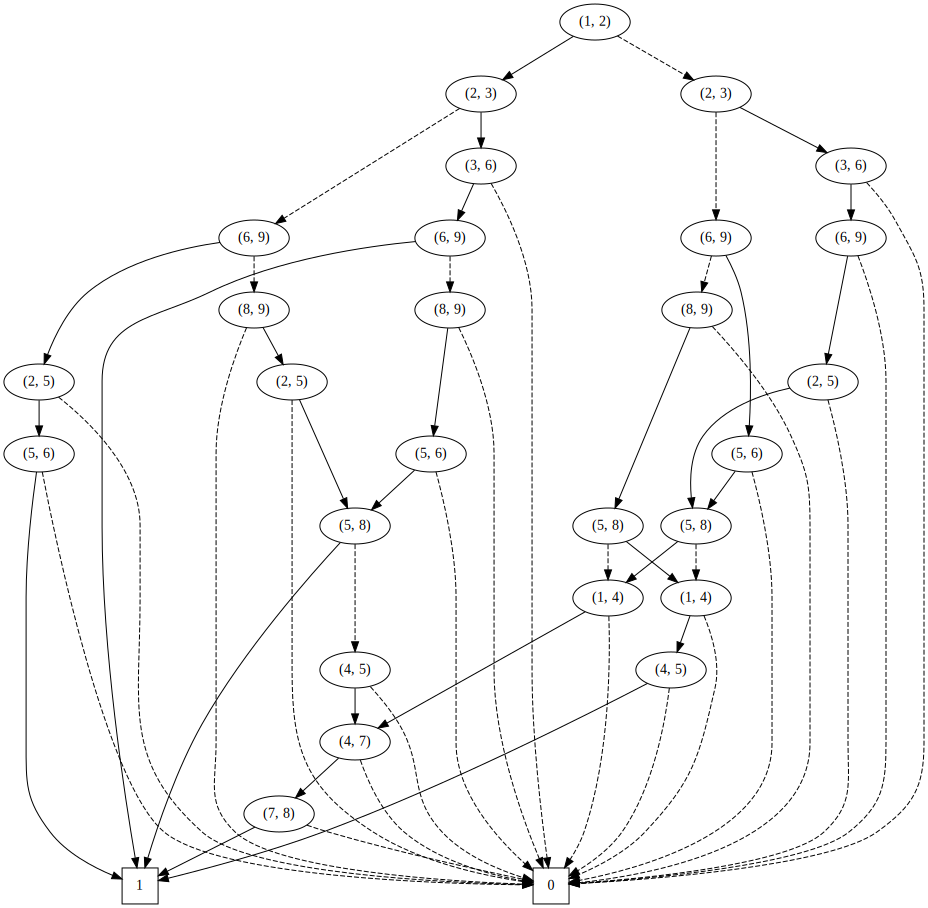

In [32]:
draw_zdd(paths)

In [33]:
zdd_size(paths)

27

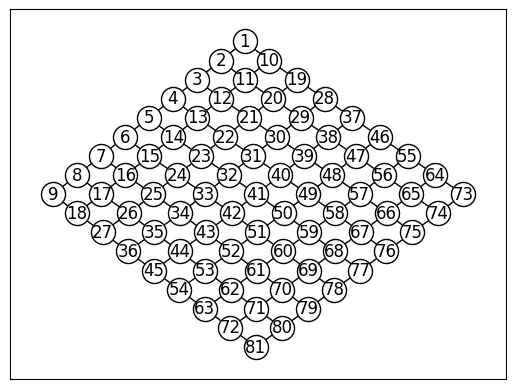

In [34]:
GraphSet.set_universe(tutorial.grid(8, 8))
paths = GraphSet.paths(1, 81)
draw_universe()

In [35]:
len(paths)

3266598486981642

In [36]:
zdd_size(paths)

194351